In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import pickle

In [2]:
IMAGE_DIR = "D:\\DEEP LEARNING\\massh\\png\\train"
MASK_DIR = "D:\\DEEP LEARNING\\massh\\png\\train_labels"


In [3]:
train_images = []
train_masks = []

In [4]:
image_filenames = sorted(os.listdir(IMAGE_DIR))  
print(image_filenames)

['22678915_15.png', '22678930_15.png', '22678945_15.png', '22678960_15.png', '22678975_15.png', '22678990_15.png', '22679005_15.png', '22679020_15.png', '22679035_15.png', '22679050_15.png', '22828915_15.png', '22828945_15.png', '22828960_15.png', '22828975_15.png', '22829005_15.png', '22829020_15.png', '22829035_15.png', '22978870_15.png', '22978885_15.png', '22978900_15.png', '22978915_15.png', '22978930_15.png', '22978960_15.png', '22978975_15.png', '22978990_15.png', '22979005_15.png', '22979020_15.png', '22979035_15.png', '22979050_15.png', '22979065_15.png', '23128870_15.png', '23128885_15.png', '23128900_15.png', '23128915_15.png', '23128930_15.png', '23128945_15.png', '23128960_15.png', '23128975_15.png', '23128990_15.png', '23129005_15.png', '23129020_15.png', '23129035_15.png', '23129050_15.png', '23129065_15.png', '23129125_15.png', '23129140_15.png', '23129155_15.png', '23129170_15.png', '23278885_15.png', '23278900_15.png', '23278915_15.png', '23278930_15.png', '23278945_1

In [5]:
mask_filenames = sorted(os.listdir(MASK_DIR))
print(mask_filenames)

['22678915_15.png', '22678930_15.png', '22678945_15.png', '22678960_15.png', '22678975_15.png', '22678990_15.png', '22679005_15.png', '22679020_15.png', '22679035_15.png', '22679050_15.png', '22828915_15.png', '22828945_15.png', '22828960_15.png', '22828975_15.png', '22829005_15.png', '22829020_15.png', '22829035_15.png', '22978870_15.png', '22978885_15.png', '22978900_15.png', '22978915_15.png', '22978930_15.png', '22978960_15.png', '22978975_15.png', '22978990_15.png', '22979005_15.png', '22979020_15.png', '22979035_15.png', '22979050_15.png', '22979065_15.png', '23128870_15.png', '23128885_15.png', '23128900_15.png', '23128915_15.png', '23128930_15.png', '23128945_15.png', '23128960_15.png', '23128975_15.png', '23128990_15.png', '23129005_15.png', '23129020_15.png', '23129035_15.png', '23129050_15.png', '23129065_15.png', '23129125_15.png', '23129140_15.png', '23129155_15.png', '23129170_15.png', '23278885_15.png', '23278900_15.png', '23278915_15.png', '23278930_15.png', '23278945_1

In [6]:
'''
num_samples_to_display = 5  

for i, (img_file, mask_file) in enumerate(zip(image_filenames, mask_filenames)):
  
    try:
        # Load image & mask WITHOUT preprocessing
        img_path = os.path.join(IMAGE_DIR, img_file)
        mask_path = os.path.join(MASK_DIR, mask_file)

        img = load_img(img_path)  # Load original image
        mask = load_img(mask_path, color_mode="grayscale")  # Load original mask in grayscale

        # Display the image & mask side by side
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(img)  # Show original image
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")  # Show original mask
        plt.axis("off")

        plt.show()

    except Exception as e:
        print(f"Error loading {img_file} or {mask_file}: {e}")
'''

'\nnum_samples_to_display = 5  \n\nfor i, (img_file, mask_file) in enumerate(zip(image_filenames, mask_filenames)):\n  \n    try:\n        # Load image & mask WITHOUT preprocessing\n        img_path = os.path.join(IMAGE_DIR, img_file)\n        mask_path = os.path.join(MASK_DIR, mask_file)\n\n        img = load_img(img_path)  # Load original image\n        mask = load_img(mask_path, color_mode="grayscale")  # Load original mask in grayscale\n\n        # Display the image & mask side by side\n        plt.figure(figsize=(10, 5))\n\n        plt.subplot(1, 2, 1)\n        plt.imshow(img)  # Show original image\n        plt.axis("off")\n\n        plt.subplot(1, 2, 2)\n        plt.imshow(mask, cmap="gray")  # Show original mask\n        plt.axis("off")\n\n        plt.show()\n\n    except Exception as e:\n        print(f"Error loading {img_file} or {mask_file}: {e}")\n'

In [7]:
for  img_file, mask_file in zip(image_filenames, mask_filenames):
    try:
    
        img_path = os.path.join(IMAGE_DIR, img_file)
        mask_path = os.path.join(MASK_DIR, mask_file)

        img = load_img(img_path, target_size=(256, 256)) 
        mask = load_img(mask_path, target_size=(256, 256), color_mode="grayscale")  

        # Convert to NumPy arrays
        img = img_to_array(img) / 255.0  
        mask = img_to_array(mask).astype(np.uint8) / 255.0

        train_images.append(img)
        train_masks.append(mask)

    except Exception as e:
        print(f"Error loading {img_file} or {mask_file}: {e}")

In [8]:
images=np.array(train_images)
masks=np.array(train_masks)

In [9]:
images.shape

(137, 256, 256, 3)

In [10]:
masks.shape

(137, 256, 256, 1)

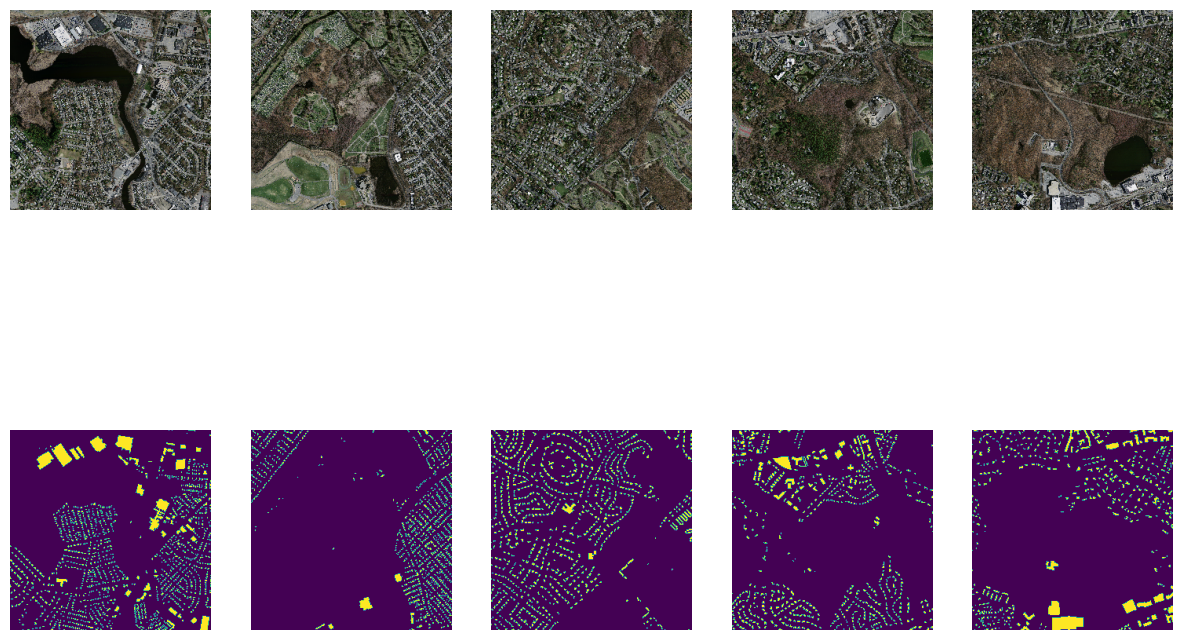

In [11]:
i=0
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.subplot(2,5,i+6)
    plt.imshow(masks[i])
    plt.axis('off')
plt.show()

In [12]:

'''
num_samples = len(images)
batch_size = 10  
num_batches = (num_samples + batch_size - 1) // batch_size

for batch in range(num_batches):
    start_idx = batch * batch_size
    end_idx = min((batch + 1) * batch_size, num_samples)
    plt.figure(figsize=(10, 5 * (end_idx - start_idx)))
    for i in range(start_idx, end_idx):
        plt.subplot(end_idx - start_idx, 2, 2 * (i - start_idx) + 1)
        plt.imshow(images[i])
        plt.axis('off')

        plt.subplot(end_idx - start_idx, 2, 2 * (i - start_idx) + 2)
        plt.imshow(masks[i])
        plt.axis('off')
        plt.title(f"Mask {i + 1}")

    plt.tight_layout()
    plt.show()
'''

'\nnum_samples = len(images)\nbatch_size = 10  \nnum_batches = (num_samples + batch_size - 1) // batch_size\n\nfor batch in range(num_batches):\n    start_idx = batch * batch_size\n    end_idx = min((batch + 1) * batch_size, num_samples)\n    plt.figure(figsize=(10, 5 * (end_idx - start_idx)))\n    for i in range(start_idx, end_idx):\n        plt.subplot(end_idx - start_idx, 2, 2 * (i - start_idx) + 1)\n        plt.imshow(images[i])\n        plt.axis(\'off\')\n\n        plt.subplot(end_idx - start_idx, 2, 2 * (i - start_idx) + 2)\n        plt.imshow(masks[i])\n        plt.axis(\'off\')\n        plt.title(f"Mask {i + 1}")\n\n    plt.tight_layout()\n    plt.show()\n'

In [13]:
for i , mask in enumerate(masks):
    print(f"Mask {i+1} : {np.unique(mask)}")

Mask 1 : [0. 1.]
Mask 2 : [0. 1.]
Mask 3 : [0. 1.]
Mask 4 : [0. 1.]
Mask 5 : [0. 1.]
Mask 6 : [0. 1.]
Mask 7 : [0. 1.]
Mask 8 : [0. 1.]
Mask 9 : [0. 1.]
Mask 10 : [0. 1.]
Mask 11 : [0. 1.]
Mask 12 : [0. 1.]
Mask 13 : [0. 1.]
Mask 14 : [0. 1.]
Mask 15 : [0. 1.]
Mask 16 : [0. 1.]
Mask 17 : [0. 1.]
Mask 18 : [0. 1.]
Mask 19 : [0. 1.]
Mask 20 : [0. 1.]
Mask 21 : [0. 1.]
Mask 22 : [0. 1.]
Mask 23 : [0. 1.]
Mask 24 : [0. 1.]
Mask 25 : [0. 1.]
Mask 26 : [0. 1.]
Mask 27 : [0. 1.]
Mask 28 : [0. 1.]
Mask 29 : [0. 1.]
Mask 30 : [0. 1.]
Mask 31 : [0. 1.]
Mask 32 : [0. 1.]
Mask 33 : [0. 1.]
Mask 34 : [0. 1.]
Mask 35 : [0. 1.]
Mask 36 : [0. 1.]
Mask 37 : [0. 1.]
Mask 38 : [0. 1.]
Mask 39 : [0. 1.]
Mask 40 : [0. 1.]
Mask 41 : [0. 1.]
Mask 42 : [0. 1.]
Mask 43 : [0. 1.]
Mask 44 : [0. 1.]
Mask 45 : [0. 1.]
Mask 46 : [0. 1.]
Mask 47 : [0. 1.]
Mask 48 : [0. 1.]
Mask 49 : [0. 1.]
Mask 50 : [0. 1.]
Mask 51 : [0. 1.]
Mask 52 : [0. 1.]
Mask 53 : [0. 1.]
Mask 54 : [0. 1.]
Mask 55 : [0. 1.]
Mask 56 : [0. 1.]
M

In [14]:
VAL_IMAGE_DIR = "D:\\DEEP LEARNING\\massh\\png\\val"
VAL_MASK_DIR = "D:\\DEEP LEARNING\\massh\\png\\val_labels"

In [15]:
val_image_filenames = sorted(os.listdir(VAL_IMAGE_DIR))
val_mask_filenames = sorted(os.listdir(VAL_MASK_DIR))

In [16]:
val_images = []
val_masks = []

In [17]:
for img_file, mask_file in zip(val_image_filenames, val_mask_filenames):
    try:
        img_path = os.path.join(VAL_IMAGE_DIR, img_file)
        mask_path = os.path.join(VAL_MASK_DIR, mask_file)

        img = load_img(img_path, target_size=(256, 256))  
        mask = load_img(mask_path, target_size=(256, 256), color_mode="grayscale") 

        img = img_to_array(img) / 255.0  
        mask = img_to_array(mask).astype(np.uint8) / 255.0

        val_images.append(img)
        val_masks.append(mask)

    except Exception as e:
        print(f"Error loading {img_file} or {mask_file}: {e}")

In [18]:
val_images=np.array(val_images)
val_masks=np.array(val_masks)

In [19]:
with open('train_images.pkl', 'wb') as file:
    pickle.dump(images,file)

In [20]:
with open('train_masks.pkl', 'wb') as file:
    pickle.dump(masks,file)

In [21]:
with open('val_images.pkl', 'wb') as file:
    pickle.dump(val_images,file)

In [22]:
with open('val_masks.pkl', 'wb') as file:
    pickle.dump(val_masks,file)